# سوال شماره 5

# بخش اول

تصویر cameraman را بارگزاری و PSNR, MSE آن را با خود تصویر بدون تغییر محاسبه نمایید. بطور رندم 10 پیکسل 
از تصویر را با مقادیر 255 تعویض نمایید و تصویر تغییر یافته را به کمک روش های PSNR, MSE با تصویر اصلی مقایسه نمایید. 
تمامی پیکسل های تصویر اصلی را یک پیکسل به سمت باال انتقال دهید و بطریق روش های گفته شده با تصویر اصلی مقایسه نمایید. 
در هرکدام مراحل با ارایه تصاویر و مقادیر PSNR, MSE گزارشی پیرامون مقادیر این توابع ارایه نمایید.

In [1]:
import numpy
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
import struct as st

در بخش زیر تابعی برای محاسبه MSE طبق فرمول زیر ارایه دادیم
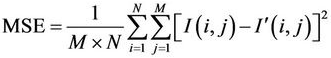

In [2]:
def calculateMSE(FirstImage , SecondImage):
    imageSize = FirstImage.shape
    MSEArray = (FirstImage - SecondImage) ** 2

    MSE = MSEArray.sum() / (imageSize[0] * imageSize[1])

    return MSE

در بحش زیر نیز تابعی برای محاسبه PSNR طبق فرمول زیر ارایه دادیم
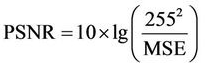

In [3]:

def calculatePSNR(FirstImage , SecondImage):
    MSE = calculateMSE(FirstImage , SecondImage)

    if(MSE == 0):
        return "infinity"
    
    PSNR = 10 * numpy.log((255 ** 2) / MSE)

    return PSNR

در مرحله بعد تصویر مربوط به cameraMan را میخوانیم

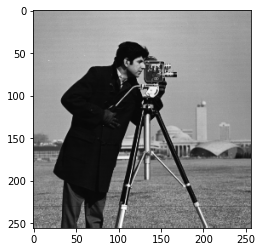

In [4]:
cameraman = cv2.imread("../cameraman.tif")

#showing cameraman
plt.imshow(cameraman)
plt.show()

حال نوبت به محاسبه PSNR و MSE تصویر cameraman با خودش میرسد که در بخش پایین انجام شده است

In [5]:
MSE = calculateMSE(cameraman , cameraman)
PSNR = calculatePSNR(cameraman , cameraman)

print("MSE = " , MSE)
print("PSNR = " , PSNR)

MSE =  0.0
PSNR =  infinity


همانطور که نتیجه نشان داد مقدار MSE یک تصویر با خودش برابر 0 است و مقدار PSNR آن چون تقسیم بر صفر دارد تعریف نشده است و یا میتوان گفت خیلی بزرگ است،

در بخش پایین تصور 10 پیکسل از تصویر cameraman را به طور رندم انتخاب و مقدار آن ها را برابر 255 قرار میدهیم و سپس مقادیر MSE و PSNR آن را محاسبه میکنیم.

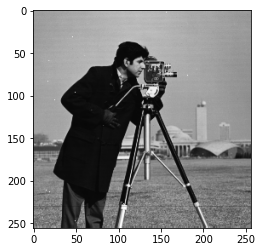

In [6]:
noisyCameraman = deepcopy(cameraman)

xpositions = numpy.random.randint(cameraman.shape[0] , size = 10)
ypositions = numpy.random.randint(cameraman.shape[1] , size = 10)

for i in range(10):
    x = xpositions[i]
    y = ypositions[i]
    noisyCameraman[x , y] = 255
    
plt.imshow(noisyCameraman)
plt.show()

حال به حاسبه MSE و PSNR میپردازیم برای تصویر فوق

In [7]:
MSE = calculateMSE(noisyCameraman , cameraman)
PSNR = calculatePSNR(noisyCameraman , cameraman)

print("MSE = " , MSE)
print("PSNR = " , PSNR)

MSE =  0.0731048583984375
PSNR =  136.98387542392854


با توجه به مقادیر بدست امده متوجه میشویم که تصویر فوق با تصویر اصلی تفاوت زیادی نمیکند و معیار های MSE و PSNR تفاوت زیادی را نشان نمیدهند چیزی که چشم ما نیز آن را تایید میکند

در مرحله بعد تصویر اصلی را یک پیکسل به سمت بالا میبریم و معیار های فوق را برای آن محاسبه میکنیم. لازم به ذکر است بنده وقتی تصویر را یک پیکسل به سمت بالا میبرم فرض را بر این گذاشتم که بخش پایین تصویر که بالا میاید مقدار 0 روشنایی را دارد بنابراین اقدام به 0 کردن مقدار روشنایی ردیف پیکسل های پایین تصویر نتیجه شده کردم

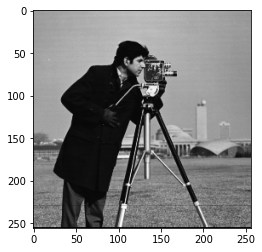

In [8]:
shiftedCameraman = numpy.roll(cameraman , -1 , axis=0)

for i in range(len(shiftedCameraman[0])):
    shiftedCameraman[shiftedCameraman.shape[1] - 1][i] = 0

plt.imshow(shiftedCameraman)
plt.show()

حال به حاسبه MSE و PSNR میپردازیم برای تصویر فوق

In [9]:
MSE = calculateMSE(shiftedCameraman , cameraman)
PSNR = calculatePSNR(shiftedCameraman , cameraman)

print("MSE = " , MSE)
print("PSNR = " , PSNR)

MSE =  102.23382568359375
PSNR =  64.55264491929887


با توجه به مقادیر نتیجه شده میتوان این استنباط را کرد که این تصاویر شباهت زیادی با تصویر اصلی ندارند درحالی که چشم ما چیز دیگری میگوید و عملا بین تصویر فوق و تصویر بالا تفاوتی در نظر نمیگیرد. بنابراین میتوان گفت معیار های مذکور در بعضی موارد قابل اعتماد نیستند
حتی با توجه به اعداد بدست امده در تصویر نویزی شده و مقایسه آن با این تصویر میتوان استنباط کرد که اختلاف دو تصویر انتقال داده شده و نویزی شده زیاد است، اما از نظر چشم ما چنین چیزی درست نیست.

# بخش دوم

در ابتدا تابعی را میسازیم که تصاویر مربوط به داده ها و لیبل هارا از دیتاست برای ما لود کند و برگرنداند

In [10]:
def loadMinistData(prefix):
    data = {
        "train":{
            "image_path":"../minist/train-images.idx3-ubyte",
            "label_path":"../minist/train-labels.idx1-ubyte"
        },
        "t10k":{
            "image_path":"../minist/t10k-images.idx3-ubyte",
            "label_path":"../minist/t10k-labels.idx1-ubyte"
        }
    }
#     Reading labels
    with open (data[prefix]["label_path"], "rb") as lbpath:
        magic, n=st.unpack (">ii", lbpath.read (8))
        labels=numpy.fromfile (lbpath, dtype=numpy.uint8)

#     Reading images
    train_imagesfile = open(data[prefix]["image_path"],'rb')
    train_imagesfile.seek(0)
    magic = st.unpack('>4B',train_imagesfile.read(4))
    nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
    nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
    nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of column
    images_array = numpy.zeros((nImg,nR,nC))
    nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
    images_array = numpy.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))
    
#     Returning the result
    return images_array , labels

چند تصویر از این تصاویر را مشاهده میکنید که نمایش داده شده برای مثال

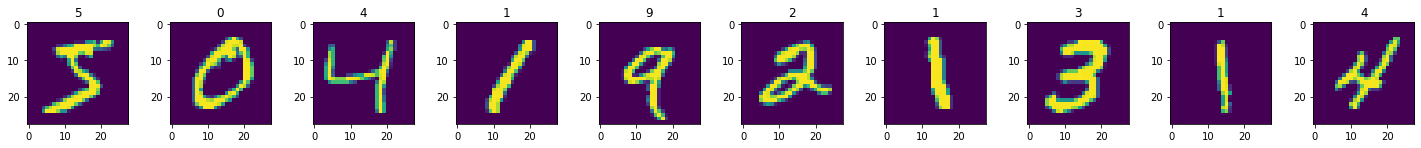

In [11]:
imgArray , labels = loadMinistData("train")
fig, subplot = plt.subplots(1 , 10 , figsize=(20, 20))
fig.tight_layout()
for j in range(10):
    subplot[j].imshow(imgArray[j])
    subplot[j].set_title(labels[j])

plt.show()

حال تمام اعداد 3 را بدست می اوریم و میانگین تصویر آن ها را محاسبه میکنیم و در خروجی نمایش میدهیم.

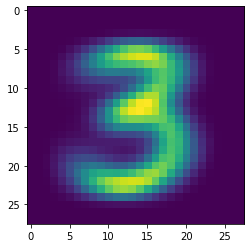

In [12]:
sumOF3 = numpy.zeros(imgArray[0].shape)
counter3 = 0

# loop on images
for i in range(len(imgArray)):
    if(labels[i] == 3):
        counter3 = counter3 + 1
        array = numpy.array(imgArray[i])
        sumOF3 = sumOF3 + array

# calculating mean
sumOF3 = sumOF3 / counter3

plt.imshow(sumOF3)
plt.show()

حال به سراغ عدد 7 میرویم و همین عمل را تکرار میکنیم

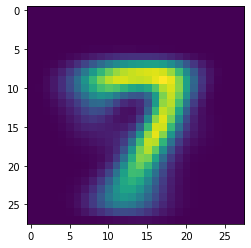

In [13]:

sumOF7 = numpy.zeros(imgArray[0].shape)
counter7 = 0

# loop on images
for i in range(len(imgArray)):
    if(labels[i] == 7):
        counter7 = counter7 + 1
        array = numpy.array(imgArray[i])
        sumOF7 = sumOF7 + array

# calculating mean
sumOF7 = sumOF7 / counter7

plt.imshow(sumOF7)
plt.show()

در این مرحله دو تابع پیاده سازی میکنیم تا با استفاده از معیار های MSE و PSNR تشخیص بدهند تا تصویر مورد نظر مربوط به چه عددی است

In [14]:
def guessByMSE(image):
    MSEWith7 = calculateMSE(sumOF7 , image)
    MSEWith3 = calculateMSE(sumOF3 , image)
    
    if(MSEWith3 < MSEWith7):
        return 3
    else:
        return 7

In [15]:
def guessByPSNR(image):
    PSNRWith7 = calculatePSNR(sumOF7 , image)
    PSNRWith3 = calculatePSNR(sumOF3 , image)
    
    if(PSNRWith3 < PSNRWith7):
        return 7
    else:
        return 3

در این بخش از کد تمام اعداد 3 و 7 را از سری valid را میخواینیم و با استفاده از توابع بالا تشخیص میدهیم که مربوط به کدام عدد است؟ 3 یا 7؟ سپس با اعلام نتایج به بررسی آن ها میپردازیم

در بخش اول این اعداد را میخوانیم و تعداد کل 3ها و 7ها را محاسبه میکنیم

In [16]:
validImgArray , labels = loadMinistData("t10k")

threeNumbers = 0
sevenNumbers = 0

for num in range(len(validImgArray)):
    if(labels[num] == 3):
        threeNumbers = threeNumbers + 1
    elif(labels[num] == 7):
        sevenNumbers = sevenNumbers + 1

در بخش بعد تمام اعداد 3 و 7 را از سری valid میخوانیم، و تعداد تشخیص های درست را براساس معیار MSE برای عدد 3 حساب میکنیم 

In [17]:
correctMSEGuessFor3 = 0

for number in range(len(validImgArray)):
    
    realResult = labels[number]
    if(realResult != 3 and realResult != 7):
        continue
        
    guessResult = guessByMSE(validImgArray[number])
    
    if(realResult == 3 and guessResult == realResult):
        correctMSEGuessFor3 = correctMSEGuessFor3 + 1


در مرحله بعد تعداد تشخیص های درست بر اساس معیار PSNR را برای عدد 3 حساب میکنیم

In [18]:
correctPSNRGuessFor3 = 0

for number in range(len(validImgArray)):
    
    realResult = labels[number]
    if(realResult != 3 and realResult != 7):
        continue
        
    guessResult = guessByPSNR(validImgArray[number])
    
    if(realResult == 3 and guessResult == realResult):
        correctPSNRGuessFor3 = correctPSNRGuessFor3 + 1

کد بخش بعد برای محاسبه تعداد تشخیص های درست بر اساس معیار MSE برای عدد 7 است

In [19]:
correctMSEGuessFor7 = 0

for number in range(len(validImgArray)):
    
    realResult = labels[number]
    if(realResult != 3 and realResult != 7):
        continue
        
    guessResult = guessByMSE(validImgArray[number])

    if(realResult == 7 and guessResult == realResult):
        correctMSEGuessFor7 = correctMSEGuessFor7 + 1

و در اخرین مرحله محاسبات، تعداد تشخیص های درست براساس معیار PSNR برای عدد 7 محاسبه میشود

In [20]:
correctPSNRGuessFor7 = 0

for number in range(len(validImgArray)):
    
    realResult = labels[number]
    if(realResult != 3 and realResult != 7):
        continue
        
    guessResult = guessByPSNR(validImgArray[number])

    if(realResult == 7 and guessResult == realResult):
        correctPSNRGuessFor7 = correctPSNRGuessFor7 + 1

در مرحله اخر نتایج برای بررسی چاپ میشوند

In [26]:
print("all 3 numbers :" , threeNumbers)
print("all 7 numbers :" , sevenNumbers)

print()
print()
print("MSE recognition -----")
print()
print("number of correct guess for 3 ----->" , correctMSEGuessFor3)
print("percent of correct guess for3 ----->" , str((correctMSEGuessFor3 / threeNumbers) * 100) + " %")
print()
print("number of correct guess for 7 ----->" , correctMSEGuessFor7)
print("percent of correct guess for7 ----->" ,  str((correctMSEGuessFor7 / sevenNumbers) * 100) + " %")
print()
print()
print("PSNR recognition -----")
print()
print("number of correct guess for 3 ----->" , correctPSNRGuessFor3)
print("percent of correct guess for3 ----->" , str((correctPSNRGuessFor3 / threeNumbers) * 100) + " %")
print()
print("number of correct guess for 7 ----->" , correctPSNRGuessFor7)
print("percent of correct guess for7 ----->" , str((correctPSNRGuessFor7 / sevenNumbers) * 100) + " %")

all 3 numbers : 1010
all 7 numbers : 1028


MSE recognition -----

number of correct guess for 3 -----> 968
percent of correct guess for3 -----> 95.84158415841584 %

number of correct guess for 7 -----> 1001
percent of correct guess for7 -----> 97.37354085603113 %


PSNR recognition -----

number of correct guess for 3 -----> 968
percent of correct guess for3 -----> 95.84158415841584 %

number of correct guess for 7 -----> 1001
percent of correct guess for7 -----> 97.37354085603113 %


# نتیجه گیری
 همانطور که میبینیم تعداد کل اعداد 3 در سری valid برابر 1010 عدد هست که با استفاده از معیار MSE و تصویر میانگین 968 تصویر 3 تشخیص داده شده که یعنی در 95 درصد بدرستی تشخیص داده شده
و برای عدد 7 نیز با استفاده از معیار MSE تا 97 درصد بدرستی تشخیص داده شده. همین نتایج در مورد معیار PSNR هم بدست امده پس به نظر می اید معیار های MSE و PSNR از لحاظ کارایی باهم تفاوت خاصی ندارند و فقط در اندازه عدد هایشان باهم متفاوت هستند.

در ورد اینکه ایا این روش برای تشخیص اعداد کارا هست یا نه میتوان گفت بله. زیرا تا بالای 95 درصد درمورد عدد 3 و بالای 97 درصد درمورد عدد 7 اعداد درست تشخیص داده شده اند پس میتوان گفت این روش ها کارا هست. در مورد چالش های پیش روی این روش میتوان به تصویر cameraman در بخش اول این سوال اشاره کرد، جایی که با یک پیکسل جابجایی تصویر مقدار MSE در اندازه قابل توجهی افزایش پیدا کرد در حالی که از نظر چشم ما این تصویر همان تصویر قبلی است. ممکن است چنین اتفاقی برای تصاویر اعداد نیز رخ دهد و باعث اشتباه بشود. در مواردی که این معیار ها قابلیت ندارند میتوانند بسیار نتیجه بدی داشته باشند.